In [3]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

from matplotlib.cm import rainbow
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix, classification_report, roc_curve, auc

from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [4]:
dataset = pd.read_csv("P:\\projects\\disease prediction and heart classification\\Heart_Disease_Prediction.csv")

dataset.head(2)


,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence


In [5]:
dataset.describe()


,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000


In [6]:
dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    object 
dtypes: float64(1), int64(12), 

In [7]:
dataset.isna().sum()


Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
Heart Disease              0
dtype: int64

In [8]:
dataset.nunique()


Age                         41
Sex                          2
Chest pain type              4
BP                          47
Cholesterol                144
FBS over 120                 2
EKG results                  3
Max HR                      90
Exercise angina              2
ST depression               39
Slope of ST                  3
Number of vessels fluro      4
Thallium                     3
Heart Disease                2
dtype: int64

In [9]:
dataset['Heart Disease'] = dataset['Heart Disease'].map({'Presence': 1, 'Absence': 0})


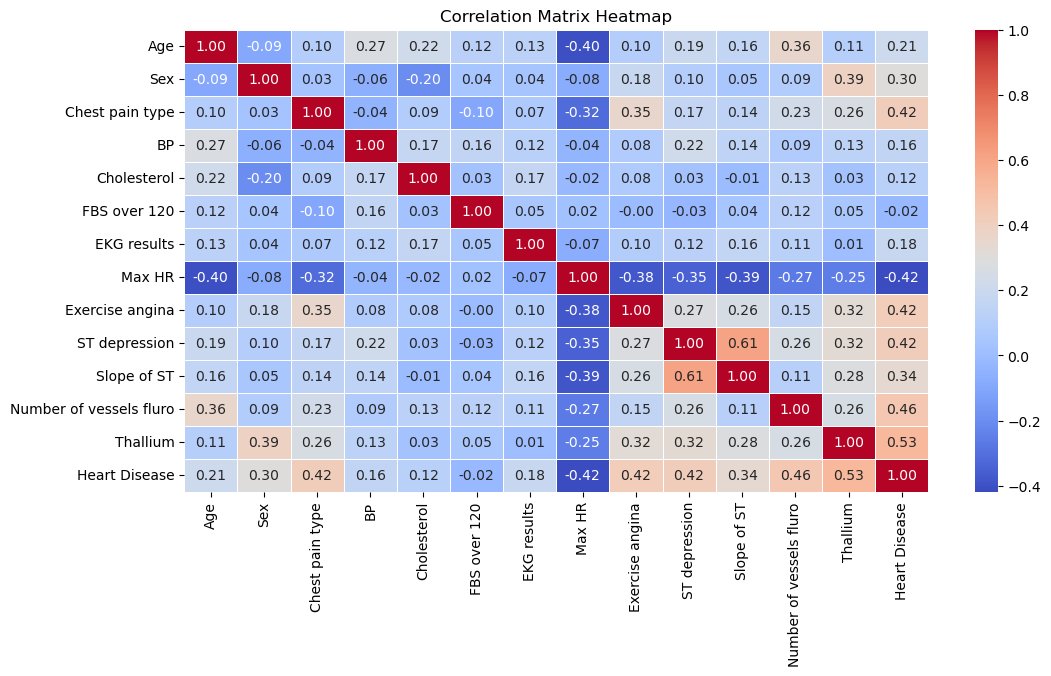

In [10]:
#corelation heatmap 

corr_matrix = dataset.corr()

plt.figure(figsize=(12,6))

sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidth = 0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()


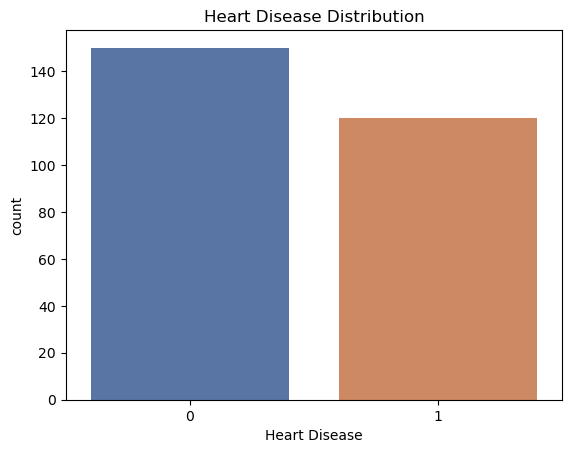

In [11]:
#plot for distribution of target column
sns.countplot(x=dataset['Heart Disease'], palette = 'deep')
plt.title("Heart Disease Distribution")
plt.show()


# Data visualization


Enter the column name  Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,      Slope of ST,Number of vessels fluro,Thallium,Heart Disease


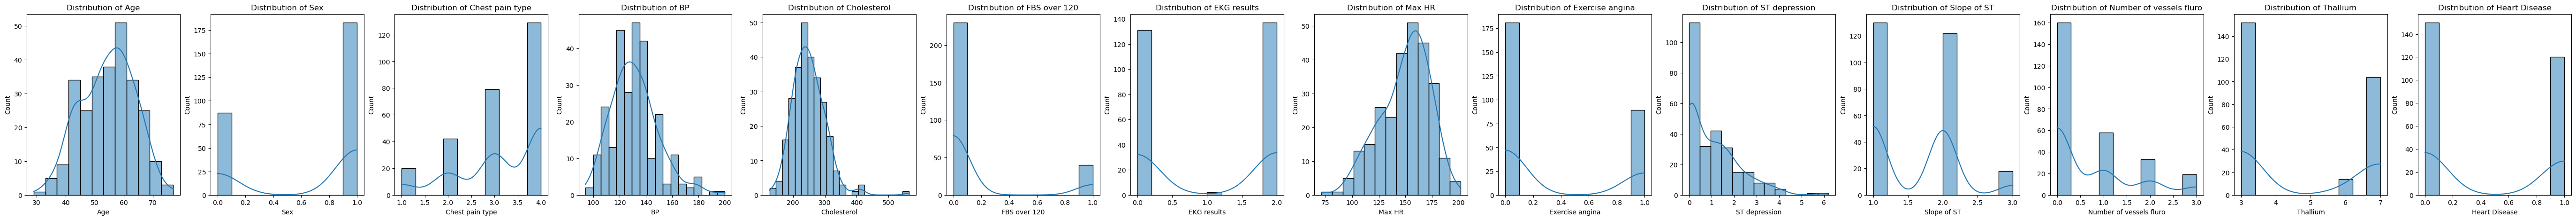

In [13]:

#function for plotting histogram to get insights on spread of data in each column
def data_spread(data, columns):
    num_plots = len(columns)
    
    fig, axes = plt.subplots(1, num_plots, figsize=(5 * num_plots, 5))
    axes = axes.flatten()


    #in case if user want only one plot
    if num_plots == 1:
        axes = [axes]


    #iterating through ewach column to create histplot
    for i, col in enumerate(columns):
        sns.histplot(data[col], bins='auto', kde=True, ax= axes[i])
        axes[i].set_title(f'Distribution of {col}')

    plt.show()


data =  dataset 

columns = input('Enter the column name ').split(',')
columns = [col.strip()for col in columns]

data_spread(dataset,columns)


In [11]:

"""" Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,
     Slope of ST,Number of vessels fluro,Thallium,Heart Disease"""


'" Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,\n     Slope of ST,Number of vessels fluro,Thallium,Heart Disease'

Enter the Columns  Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,      Slope of ST,Number of vessels fluro,Thallium,Heart Disease


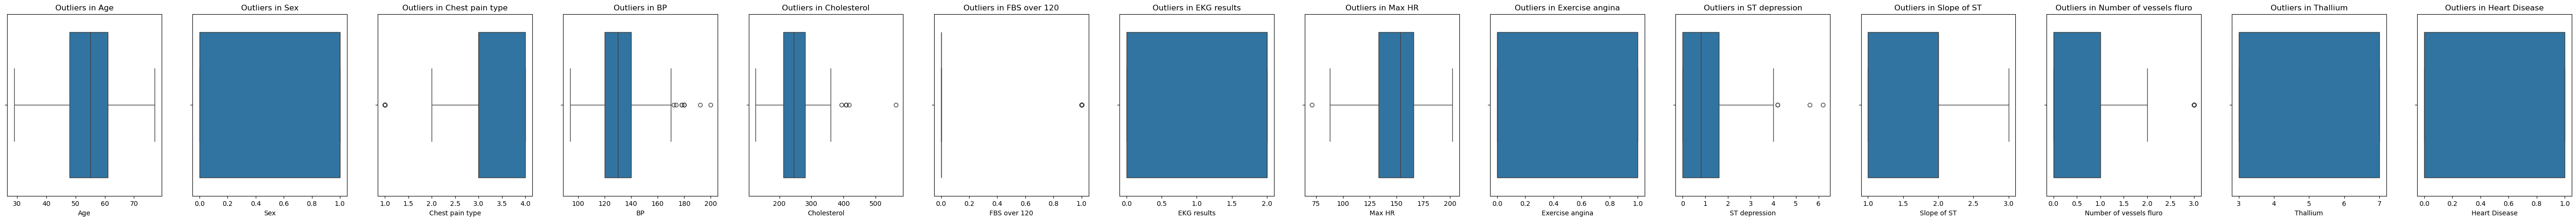

In [14]:

#function plots box plot for checking outliers in each attribute 

def box_plot(data,columns):
    num_plots = len(columns)

    fig,axes = plt.subplots(1, num_plots, figsize=(5*num_plots, 5))
    axes = axes.flatten()
    
    if num_plots == 1:
        axes = [axes]
        
    for i,col in enumerate(columns):
        sns.boxplot(x=data[col],ax=axes[i],native_scale=True)
        axes[i].set_title(f'Outliers in {col}')
        
    plt.show()

data = dataset

columns = input('Enter the Columns ').split(',')
print()
columns = [col.strip() for col in columns]

box_plot(dataset,columns)


<Figure size 1000x500 with 0 Axes>

Enter 1st column:  BP
Enter 2nd column:  ST depression


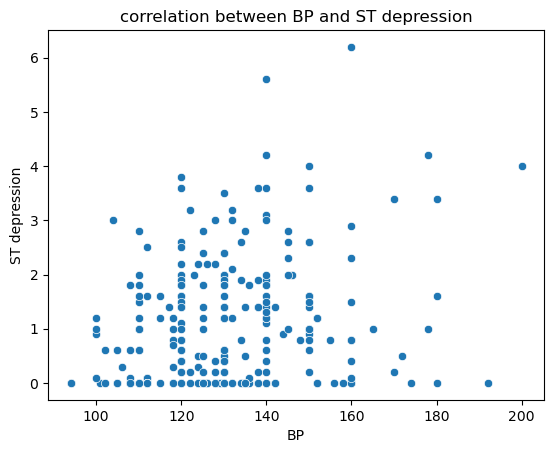

In [13]:
#scatter ploting to show relation ship between two attributes 

plt.figure(figsize=(10,5))
def scatter_plot(data,column1,column2):
    sns.scatterplot(x=data[column1],y=data[column2])
    plt.title(f'correlation between {column1} and {column2}')
    
plt.show()

column1 = input("Enter 1st column: ")
column2 = input("Enter 2nd column: ")

scatter_plot(dataset,column1,column2)

# Trainig the model 
 

In [17]:
x_train ,x_test ,y_train ,y_test = train_test_split(x ,y ,test_size=0.3 ,random_state=15)

x_train.shape,y_train.shape,x_test.shape,y_test.shape


((189, 13), (189,), (81, 13), (81,))

In [18]:
x = dataset.drop(columns=['Heart Disease'])
y = dataset["Heart Disease"]


In [19]:
from sklearn.ensemble import RandomForestClassifier

rfc_model = RandomForestClassifier(n_estimators=100 ,random_state=42)


In [20]:
rfc_model.fit(x_train,y_train)

feature_importance = pd.Series(rfc_model.feature_importances_, index=x_train.columns)
feature_importance = feature_importance.sort_values(ascending=False)  # Sort by importance

print(feature_importance)


Thallium                   0.140149
Max HR                     0.125877
Chest pain type            0.125200
ST depression              0.119272
BP                         0.079525
Cholesterol                0.078065
Exercise angina            0.073146
Age                        0.072256
Number of vessels fluro    0.071865
Sex                        0.044824
Slope of ST                0.042163
EKG results                0.020439
FBS over 120               0.007219
dtype: float64


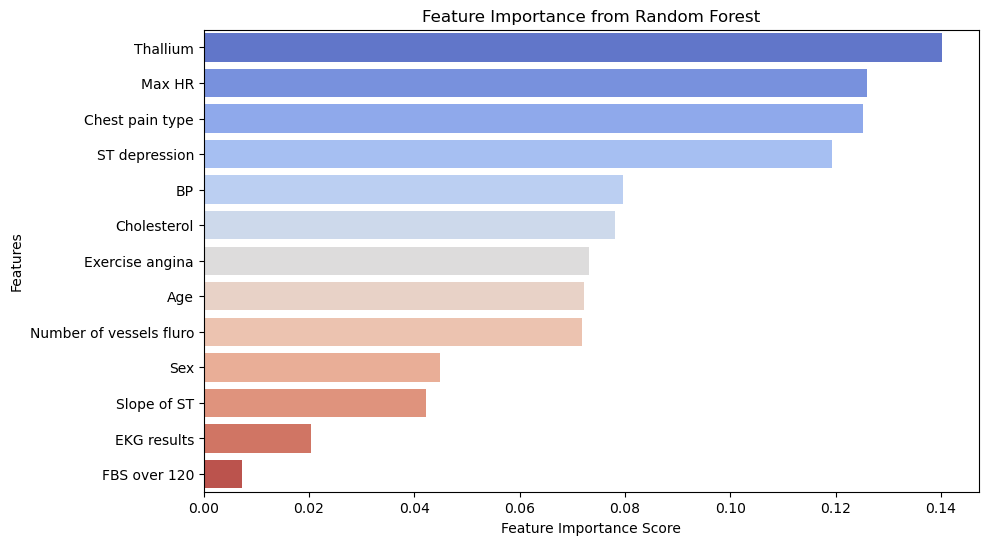

In [21]:
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance, y=feature_importance.index, palette="coolwarm")
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance from Random Forest")
plt.show()


In [22]:
rfc_pred = rfc_model.predict(x_test)


# randomforest model training on extracted features

In [23]:
#top features extraction

selected_indices = ['Chest pain type', 'BP' ,'Max HR' ,'ST depression' ,'Thallium']

top_features_xtrain = x_train[selected_indices]

top_features_xtest = x_test[selected_indices]
print('Extarcted features from x_train:')
print(top_features_xtrain.shape)
print()
print('Extarcted features from x_test:')
print(top_features_xtest.shape)


Extarcted features from x_train:
(189, 5)

Extarcted features from x_test:
(81, 5)


In [24]:
rfc_model_selected = RandomForestClassifier(n_estimators = 100, random_state =42)

rfc_model_selected.fit(top_features_xtrain, y_train) 


RandomForestClassifier(random_state=42)

In [25]:

rfc_model_selectedpred = rfc_model_selected.predict(top_features_xtest)

# SVM model 

In [26]:
from sklearn.svm import SVC

svm_model = SVC(kernel='rbf', C=1 ,gamma='scale')


In [27]:
svm_model.fit(x_train, y_train)


SVC(C=1)

In [28]:
svm_pred = svm_model.predict(x_test)


# svm model training on extracted features

In [29]:
svm_model_selected = SVC(kernel = 'rbf', C = 1, gamma = 'scale')


In [30]:
svm_model_selected.fit(top_features_xtrain , y_train)


SVC(C=1)

In [31]:
svm_model_selectedpred = svm_model_selected.predict(top_features_xtest)


# accuracy of models 

In [32]:
print('Accuracy score for Random forest cLassifier on Original Dataframe')
print(accuracy_score(y_test , rfc_pred))

Accuracy score for Random forest cLassifier on Original Dataframe
0.7283950617283951


In [33]:
print('Accuracy score for Random forest cLassifier on extracted features')
print(accuracy_score(y_test , rfc_model_selectedpred))

Accuracy score for Random forest cLassifier on extracted features
0.7160493827160493


In [34]:
print('Accuracy score for SVM model on Original Dataframe')
print(accuracy_score(y_test , svm_pred))

Accuracy score for SVM model on Original Dataframe
0.654320987654321


In [35]:
print('Accuracy score for SVM model on extracted features')
print(accuracy_score(y_test , svm_model_selectedpred))

Accuracy score for SVM model on extracted features
0.6790123456790124


-----------------------------------------------------------------------------------------------------------------------------------------------------------------------

# tuning the parametrs of random forest model

In [36]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameters to tune
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Grid Search
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(top_features_xtrain, y_train)

# Best parameters
print("Best Parameters:", grid_search.best_params_)

# Train best model
best_rf = grid_search.best_estimator_


Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}


In [37]:
rfc_modelf = RandomForestClassifier(n_estimators=100 , max_depth = None, min_samples_leaf = 1, min_samples_split =  10, random_state = 4)

In [38]:
rfc_modelf.fit(x_train,y_train)


RandomForestClassifier(min_samples_split=10, random_state=4)

In [39]:
rfc_modelf_pred = rfc_modelf.predict(x_test)
print ( accuracy_score ( y_test , rfc_modelf_pred ) )

0.7530864197530864


---------------------------------------------------------------------------------------------------------------------------------------------------------

In [40]:
#random forest model training and prediction on extracted features

rfc_model2_selected = RandomForestClassifier(n_estimators=100 , max_depth = None, min_samples_leaf = 1, min_samples_split =  10, random_state = 4)

rfc_model2_selected . fit(top_features_xtrain,y_train)

rfc_model2_selectedpred = rfc_model2_selected.predict(top_features_xtest)

print( accuracy_score ( y_test  ,  rfc_model2_selectedpred ) )

0.7160493827160493


--------------------------------------------------------------------------------------------------------------------------------------------------------

# Model Evaluation & Interpretability

In [41]:
#classification report of the model

print('Classification report for final RandomForest Classifier')
print()

# Generate classification report
report = classification_report(y_test, rfc_modelf_pred, output_dict=True)  # Convert to dictionary

# Converting to DataFrame for better visualization
report_df = pd.DataFrame(report).transpose()

# Print the report
print(report_df)

Classification report for final RandomForest Classifier

              precision    recall  f1-score    support
0              0.703704  0.904762  0.791667  42.000000
1              0.851852  0.589744  0.696970  39.000000
accuracy       0.753086  0.753086  0.753086   0.753086
macro avg      0.777778  0.747253  0.744318  81.000000
weighted avg   0.775034  0.753086  0.746072  81.000000


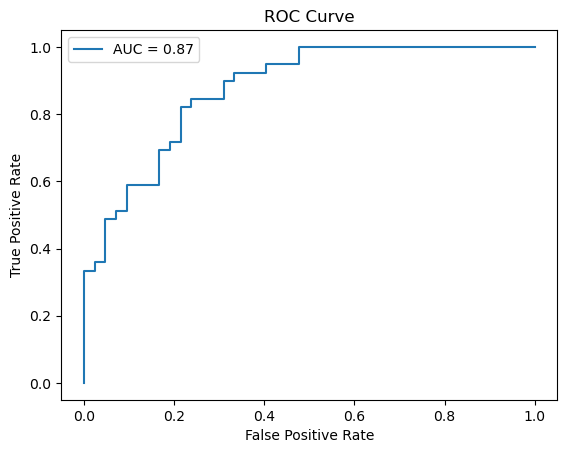

In [43]:
#plotting roc auc curves for model classifiacation

y_probs = rfc_modelf.predict_proba(x_test)[:, 1]  # Get probabilities for positive class
fpr, tpr, _ = roc_curve(y_test, y_probs)
auc_score = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f'AUC = {auc_score:.2f}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

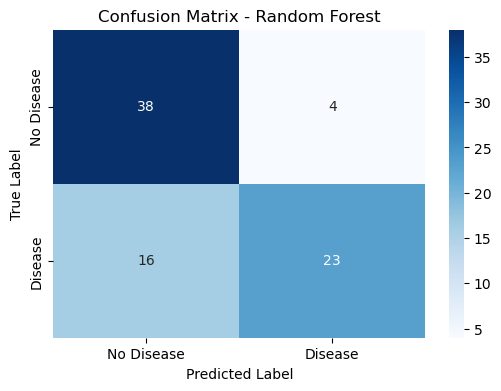

In [47]:

cm = confusion_matrix(y_test, rfc_modelf_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["No Disease", "Disease"], yticklabels=["No Disease", "Disease"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Random Forest")
plt.show()


# Save & Export the Model

In [44]:
import joblib

# Save model
joblib.dump(rfc_modelf, 'heart_disease_model.pkl')

# Load model (for later use)
loaded_model = joblib.load('heart_disease_model.pkl')


# Report on this Project

In [ ]:
Heart Disease Prediction Model: Project Report

1. Introduction
Heart disease is a major health concern worldwide, and early detection is crucial for effective treatment. This project aims to build a machine learning model to predict heart disease based on patient data. The dataset used for this study was sourced from a reliable repository and contains various medical attributes relevant to heart health.

2. Data Preprocessing
The dataset consisted of 270 entries with multiple features. Initial preprocessing steps included:
- Handling missing values (if any)
- Converting categorical variables into numerical form
- Standardizing numerical features for uniform scaling
- Checking for class imbalance (which was found to be balanced)

3. Feature Selection
To enhance model performance, feature importance analysis was conducted using Random Forest. The top four features with the highest importance scores were selected for further model training.

4. Model Training
The following models were implemented and evaluated:
- Random Forest Classifier
- Support Vector Machine (SVM)

The models were trained using both the entire feature set and the selected important features.

5. Model Evaluation
Performance was assessed using accuracy scores and the ROC-AUC curve. The best accuracy achieved was 75% using hyperparameter tuning with GridSearchCV. The ROC curve demonstrated an AUC score of 0.87, indicating a good model performance.

6. Conclusion
The model successfully predicts heart disease with an accuracy of 75%. Further improvements could be made by using ensemble learning techniques, increasing dataset size, or applying deep learning models.

7. Future Scope
- Enhancing accuracy through additional feature engineering
- Incorporating real-time patient data for continuous learning
- Deploying the model as a web or mobile application for practical use

This project serves as a foundation for further development in predictive healthcare analytics.

